In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from os import path

In [28]:
root_path= os.getcwd()
file_path=path.join(root_path,'HSIdata.csv')
df = pd.read_csv(f"{file_path}")
df1 = df.iloc[:, 1:6].copy()
df1 = df1.set_index("Name")
df1.head()

,MktCap,PE,ROE,Chg Pct Ytd
Name,,,,
AIA,1185.30,22.35,9.58,3.16
TENCENT,5982.19,40.15,24.90,10.82
HSBC HOLDINGS PL,932.89,14.06,2.31,12.27
CCB-H,1662.63,5.49,11.32,11.38
MEITUAN-B,1900.79,398.54,8.80,9.78


In [34]:
from sklearn import preprocessing 
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(df1)
scaled_data = pd.DataFrame(scaled_data, columns=df1.columns,index=df1.index)
scaled_data.head()

,MktCap,PE,ROE,Chg Pct Ytd
Name,,,,
AIA,0.516549,-0.234580,0.004922,-0.490024
TENCENT,5.079755,-0.057538,1.277148,0.215875
HSBC HOLDINGS PL,0.276435,-0.317033,-0.598804,0.349498
CCB-H,0.970625,-0.402272,0.149418,0.267481
MEITUAN-B,1.197183,3.507072,-0.059852,0.120035


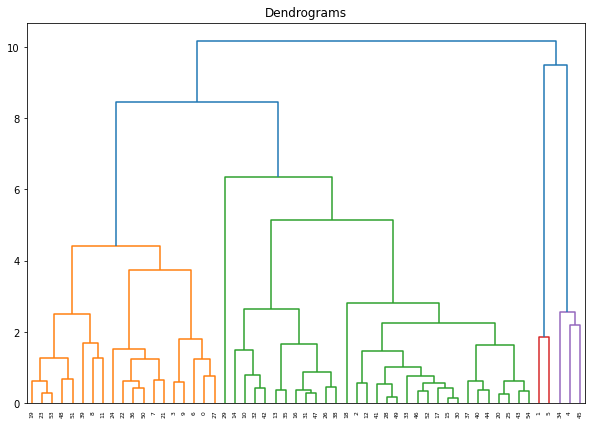

In [35]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scaled_data, method='ward'))

In [100]:
# Clustering based on Market Cap, ROE, PE, results of which will be plotted against YTD return to observe if there's any patterns
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
predict = cluster.fit_predict(scaled_data.iloc[:, 0:3])
for i in range(7):
    print('Cluster {}:{}'.format(i,df1[predict==i].index))

Cluster 0:Index(['MEITUAN-B', 'ALIBABA HEALTH', 'HAIDILAO INTERNA'], dtype='object', name='Name')
Cluster 1:Index(['AIA', 'HSBC HOLDINGS PL', 'CCB-H', 'PING AN', 'ICBC-H', 'CHINA MOBILE',
       'BANK OF CHINA-H', 'CHINA LIFE-H', 'SINOPEC CORP-H', 'PETROCHINA-H'],
      dtype='object', name='Name')
Cluster 2:Index(['XIAOMI CORP-B', 'WUXI BIOLOGICS C', 'CKH HOLDINGS', 'CNOOC', 'SHK PPT',
       'GEELY AUTOMOBILE', 'CLP HOLDINGS', 'MENGNIU DAIRY', 'HONG KG CHINA GS',
       'CHINA RES LAND', 'HANG SENG BANK', 'CK ASSET HOLDING',
       'BOC HONG KONG HO', 'SINO BIOPHARM', 'LONGFOR GROUP HO',
       'CHINA OVERSEAS', 'WH GROUP LTD', 'POWER ASSETS', 'HENDERSON LAND D',
       'CITIC', 'BUDWEISER BREWIN', 'BANKCOMM-H', 'CKI HOLDINGS',
       'AAC TECHNOLOGIES', 'CHINA UNICOM'],
      dtype='object', name='Name')
Cluster 3:Index(['SANDS CHINA LTD'], dtype='object', name='Name')
Cluster 4:Index(['HKEX', 'TECHTRONIC IND', 'SHENZHOU INTL GP', 'ANTA SPORTS PROD',
       'SUNNY OPTICAL', 'CSPC PH

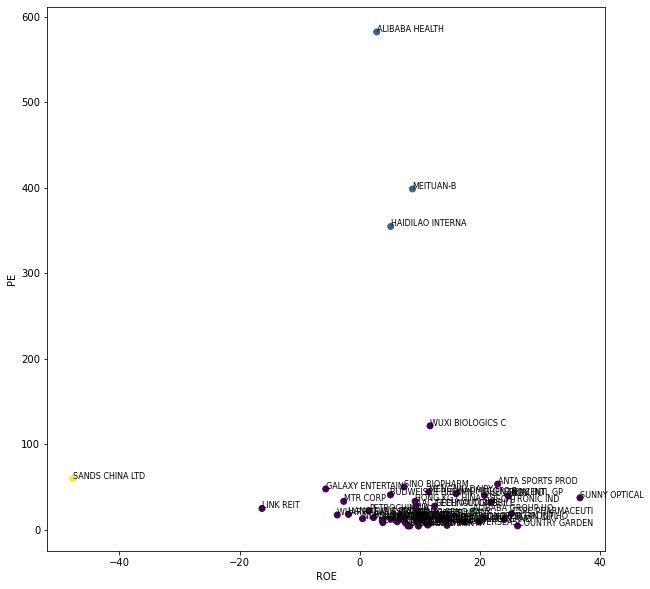

In [85]:
fig, ax = plt.subplots(1,figsize=(10,10))
x = df1['ROE']
y = df1['PE']
ax.set_xlabel('ROE')
ax.set_ylabel('PE')
plt.scatter(x,y, c=cluster.labels_) 
for i, txt in enumerate(scaled_data.index):
    ax.annotate(txt, (x[i], y[i]),fontsize=8)

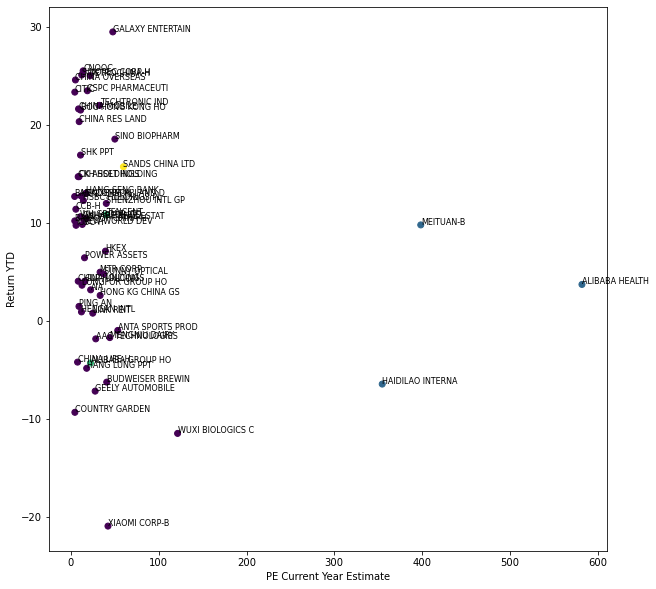

In [86]:
fig, ax = plt.subplots(1,figsize=(10, 10))
x = df1["PE"]
y = df1['Chg Pct Ytd']
ax.set_xlabel('PE Current Year Estimate')
ax.set_ylabel('Return YTD')
plt.scatter(x,y, c=cluster.labels_) 
for i, txt in enumerate(scaled_data.index):
    ax.annotate(txt, (x[i], y[i]),fontsize=8)

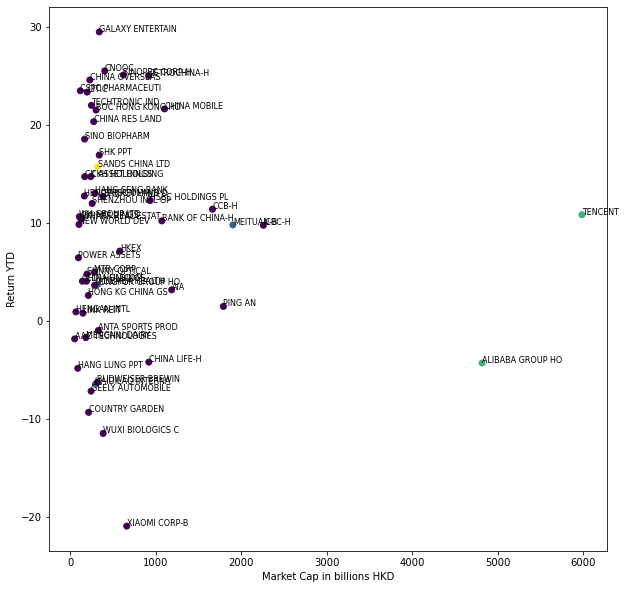

In [88]:
fig, ax = plt.subplots(1,figsize=(10,10))
x = df1['MktCap']
y = df1['Chg Pct Ytd']
ax.set_xlabel('Market Cap in billions HKD')
ax.set_ylabel('Return YTD')
plt.scatter(x,y, c=cluster.labels_) 
for i, txt in enumerate(scaled_data.index):
    ax.annotate(txt, (x[i], y[i]),fontsize=8)

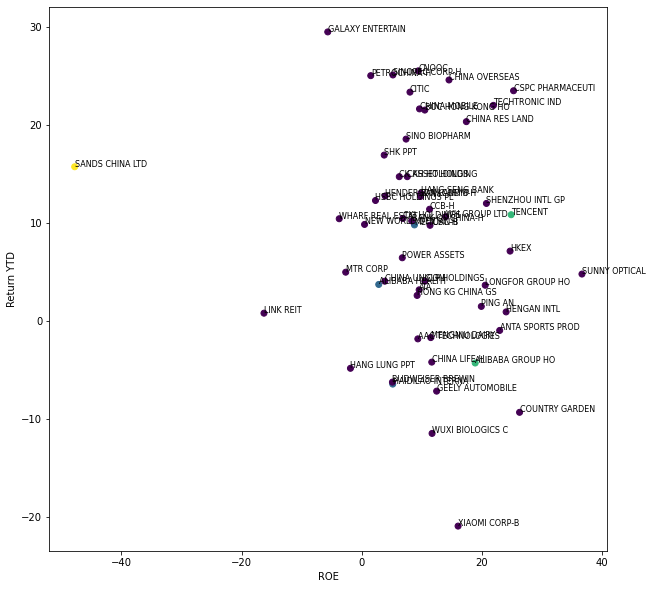

In [87]:
fig, ax = plt.subplots(1,figsize=(10,10))
x = df1['ROE']
y = df1['Chg Pct Ytd']
ax.set_xlabel('ROE')
ax.set_ylabel('Return YTD')
plt.scatter(x,y, c=cluster.labels_) 
for i, txt in enumerate(scaled_data.index):
    ax.annotate(txt, (x[i], y[i]),fontsize=8)